In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)



In [3]:
df = pd.read_csv(r"C:\UPM\EC Spatial Temporal Analysis\GROUP PROJECT\Data\Pre_processing\Data exploration_ABM\tickbites_truth_cleaned.csv")
print(df.shape)

print(df)


(26314, 5)
        month  Age_group  activity  land_use  tickbite_status
0        July          3         4        61             True
1        July          3         4        61             True
2        June          3         4        61             True
3      August          3         4        61             True
4        July          2         4        61             True
...       ...        ...       ...       ...              ...
26309    June          2         2        60             True
26310  August          2         5        20             True
26311    July          2         3        20             True
26312    July          1         1        20             True
26313  August          1         1        20             True

[26314 rows x 5 columns]


In [4]:
df.describe()

,Age_group,activity,land_use
count,26314.000000,26314.000000,26314.000000
mean,1.864293,2.243825,44.738466
std,0.592084,1.646316,19.510309
min,1.000000,1.000000,20.000000
25%,1.000000,1.000000,20.000000
50%,2.000000,2.000000,60.000000
75%,2.000000,3.000000,60.000000
max,3.000000,7.000000,62.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26314 entries, 0 to 26313
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   month            26314 non-null  object
 1   Age_group        26314 non-null  int64 
 2   activity         26314 non-null  int64 
 3   land_use         26314 non-null  int64 
 4   tickbite_status  26314 non-null  bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 848.1+ KB


In [6]:
# check if there are missing values 
df.isnull().sum().sort_values(ascending=False)

tickbite_status    0
land_use           0
activity           0
Age_group          0
month              0
dtype: int64

In [7]:
df['Age_group'] = df['Age_group'].astype('str')
df['activity'] = df['activity'].astype('str')
df['land_use'] = df['land_use'].astype('str')
df['tickbite_status'] = df['tickbite_status'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26314 entries, 0 to 26313
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   month            26314 non-null  object
 1   Age_group        26314 non-null  object
 2   activity         26314 non-null  object
 3   land_use         26314 non-null  object
 4   tickbite_status  26314 non-null  int32 
dtypes: int32(1), object(4)
memory usage: 925.2+ KB


In [8]:
print(df['month'].unique())
print(df['Age_group'].unique())
print(df['activity'].unique())
print(df['land_use'].unique())

['July' 'June' 'August' 'May' 'September' 'October' 'March' 'April'
 'December' 'November' 'January' 'February']
['3' '2' '1']
['4' '2' '7' '5' '3' '6' '1']
['61' '60' '62' '20']


In [9]:
print(df)

        month Age_group activity land_use  tickbite_status
0        July         3        4       61                1
1        July         3        4       61                1
2        June         3        4       61                1
3      August         3        4       61                1
4        July         2        4       61                1
...       ...       ...      ...      ...              ...
26309    June         2        2       60                1
26310  August         2        5       20                1
26311    July         2        3       20                1
26312    July         1        1       20                1
26313  August         1        1       20                1

[26314 rows x 5 columns]


# Visulization 

In [10]:
# group by month
month = df.groupby(['month']).sum()
print(month)

           tickbite_status
month                     
April                 1494
August                2728
December                94
February                69
January                 55
July                  6771
June                  8339
March                  391
May                   3898
November               319
October                963
September             1193


In [11]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month = month.reindex(new_order, axis=0)
print(month)
print(month.info())

           tickbite_status
month                     
January                 55
February                69
March                  391
April                 1494
May                   3898
June                  8339
July                  6771
August                2728
September             1193
October                963
November               319
December                94
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tickbite_status  12 non-null     int32
dtypes: int32(1)
memory usage: 144.0+ bytes
None


In [12]:
# group by age
age = df.groupby(['Age_group']).sum()
print(age)

# group by activity 
activity = df.groupby(['activity']).sum()
print(activity)

# group by land-use type
landuse = df.groupby(['land_use']).sum()
print(landuse)

           tickbite_status
Age_group                 
1                     6640
2                    16605
3                     3069
          tickbite_status
activity                 
1                   12138
2                    6016
3                    3863
4                    1538
5                     687
6                     806
7                    1266
          tickbite_status
land_use                 
20                  10089
60                  14578
61                   1326
62                    321


In [13]:
label_age =['Children','Adults','Elderly']
label_activity = ['Walking','Gardening','Playing','Walking dog','Picnic','Pro-Garden','Others']
label_landuse = ['Residential','Forest','Dunes','Others']


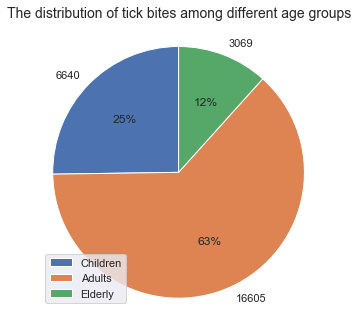

In [23]:
fig, axs = plt.subplots(1, 1,figsize=(5,5) )
axs.pie(age['tickbite_status'], labels=age['tickbite_status'],autopct='%0.f%%', startangle=90)
axs.legend(label_age,loc="best")
axs.axis('equal')
axs.set_title('The distribution of tick bites among different age groups',fontsize=14,y=1.05)

plt.savefig(r"C:\UPM\EC Spatial Temporal Analysis\GROUP PROJECT\Data\Pre_processing\Data exploration_ABM\tickbites_age.png",dpi=300)

In [15]:
print(df)

        month Age_group activity land_use  tickbite_status
0        July         3        4       61                1
1        July         3        4       61                1
2        June         3        4       61                1
3      August         3        4       61                1
4        July         2        4       61                1
...       ...       ...      ...      ...              ...
26309    June         2        2       60                1
26310  August         2        5       20                1
26311    July         2        3       20                1
26312    July         1        1       20                1
26313  August         1        1       20                1

[26314 rows x 5 columns]


In [16]:
table = pd.pivot_table(df, values='tickbite_status', index=['activity'],
                    columns=['land_use'], aggfunc=np.sum)

In [17]:
table = table.fillna(0)
table = table.astype('int')
print(table)

land_use    20    60   61   62
activity                      
1         1763  9505  815   55
2         5576   346   80   14
3         1593  2050  189   31
4          399  1057   44   38
5          150   461   57   19
6          254   473   67   12
7          354   686   74  152


In [18]:
array = table.to_numpy()
print(array)

[[1763 9505  815   55]
 [5576  346   80   14]
 [1593 2050  189   31]
 [ 399 1057   44   38]
 [ 150  461   57   19]
 [ 254  473   67   12]
 [ 354  686   74  152]]


In [19]:
totalsum = array.sum()

new_array = np.round((array/totalsum)*100,2)

In [20]:
print(new_array)

[[ 6.7  36.12  3.1   0.21]
 [21.19  1.31  0.3   0.05]
 [ 6.05  7.79  0.72  0.12]
 [ 1.52  4.02  0.17  0.14]
 [ 0.57  1.75  0.22  0.07]
 [ 0.97  1.8   0.25  0.05]
 [ 1.35  2.61  0.28  0.58]]


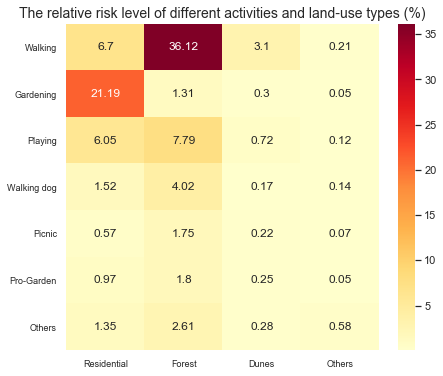

In [24]:
sns.set()
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax = sns.heatmap(new_array,cmap="YlOrRd",annot=True,fmt='')
ax.set_yticklabels(label_activity, rotation = 0, fontsize = 9)
ax.set_xticklabels(label_landuse, rotation = 0, fontsize = 9)
ax.set_title("The relative risk level of different activities and land-use types (%)",fontsize =14)
plt.savefig(r"C:\UPM\EC Spatial Temporal Analysis\GROUP PROJECT\Data\Pre_processing\Data exploration_ABM\tickbites_activity_landuse.png",dpi=300)